In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [2]:
df = pd.read_csv("Miles_Traveled.csv",index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [4]:
df.columns = ['values']

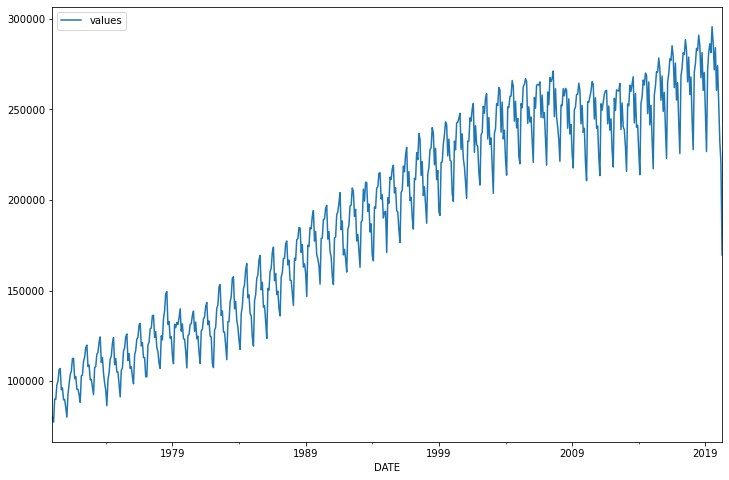

In [5]:
df.plot(figsize=(12,8))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

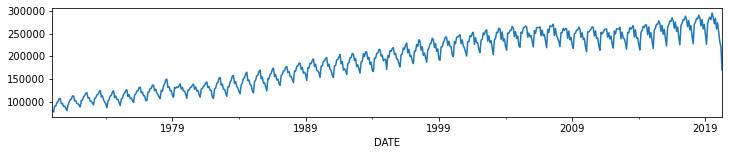

In [7]:
results = seasonal_decompose(df['values'])
results.observed.plot(figsize=(12,2))

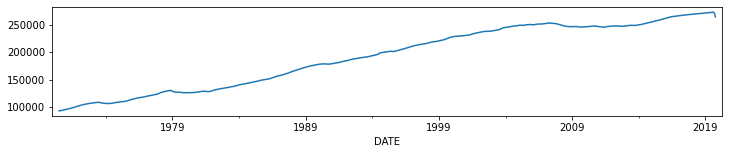

In [8]:
results.trend.plot(figsize=(12,2))

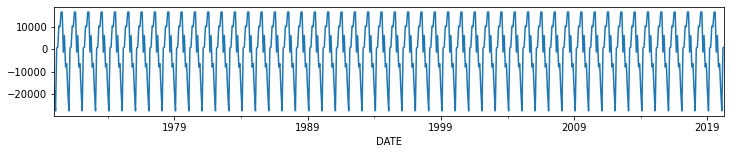

In [9]:
results.seasonal.plot(figsize=(12,2))

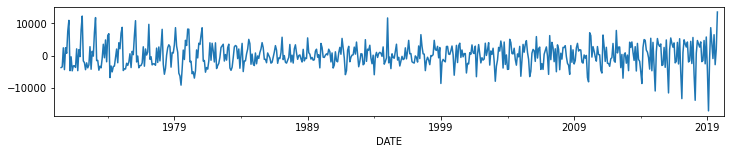

In [10]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [11]:
len(df)

604

In [12]:
604-16

588

In [13]:
train = df.iloc[:588]
test = df.iloc[588:]

In [14]:
len(test)

16

## Scale Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [18]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
scaled_train

array([[0.01278875],
       [0.        ],
       [0.05985099],
       [0.05860068],
       [0.09613809],
       [0.10579872],
       [0.13556735],
       [0.13826933],
       [0.08341021],
       [0.08838804],
       [0.05732696],
       [0.05838996],
       [0.0369661 ],
       [0.0125312 ],
       [0.0727334 ],
       [0.09676558],
       [0.1227505 ],
       [0.13107653],
       [0.16401073],
       [0.16483491],
       [0.11167565],
       [0.11745892],
       [0.08481974],
       [0.08463242],
       [0.07034985],
       [0.05071483],
       [0.11933673],
       [0.12079776],
       [0.15688818],
       [0.1677523 ],
       [0.19270699],
       [0.19888362],
       [0.14343447],
       [0.14703555],
       [0.10933893],
       [0.11050495],
       [0.09001297],
       [0.0708275 ],
       [0.14070907],
       [0.14365924],
       [0.17502938],
       [0.17989951],
       [0.20718156],
       [0.22001714],
       [0.15401762],
       [0.16692812],
       [0.12615022],
       [0.100

In [21]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
len(scaled_train)

588

In [23]:
len(generator) # n_input = 2

586

In [24]:
scaled_train

array([[0.01278875],
       [0.        ],
       [0.05985099],
       [0.05860068],
       [0.09613809],
       [0.10579872],
       [0.13556735],
       [0.13826933],
       [0.08341021],
       [0.08838804],
       [0.05732696],
       [0.05838996],
       [0.0369661 ],
       [0.0125312 ],
       [0.0727334 ],
       [0.09676558],
       [0.1227505 ],
       [0.13107653],
       [0.16401073],
       [0.16483491],
       [0.11167565],
       [0.11745892],
       [0.08481974],
       [0.08463242],
       [0.07034985],
       [0.05071483],
       [0.11933673],
       [0.12079776],
       [0.15688818],
       [0.1677523 ],
       [0.19270699],
       [0.19888362],
       [0.14343447],
       [0.14703555],
       [0.10933893],
       [0.11050495],
       [0.09001297],
       [0.0708275 ],
       [0.14070907],
       [0.14365924],
       [0.17502938],
       [0.17989951],
       [0.20718156],
       [0.22001714],
       [0.15401762],
       [0.16692812],
       [0.12615022],
       [0.100

In [27]:
# What does the first batch look like?
X,y = generator[0]

In [28]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01278875 0.        ]
Predict this y: 
 [[0.05985099]]


In [29]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [30]:
X,y = generator[0]

In [31]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01278875 0.         0.05985099 0.05860068 0.09613809 0.10579872
 0.13556735 0.13826933 0.08341021 0.08838804 0.05732696 0.05838996]
Predict this y: 
 [[0.0369661]]


### Create the Model

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [33]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [35]:
%%time
# fit model
model.fit_generator(generator,epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0158
Epoch 2/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 3/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0045
Epoch 4/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 5/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 6/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 7/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 8/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 9/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0015
Epoch 10/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 11/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 12/50
576/576 [==========

In [36]:
model.history.history.keys()

dict_keys(['loss'])

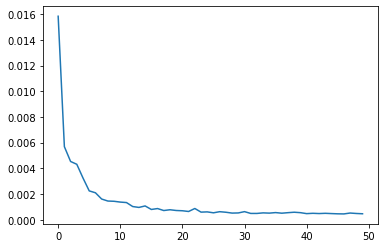

In [37]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [38]:
first_eval_batch = scaled_train[-12:]

In [39]:
first_eval_batch

array([[0.78340599],
       [0.70390593],
       [0.90501388],
       [0.92572127],
       [0.96592788],
       [0.96094068],
       [1.        ],
       [0.97190314],
       [0.88969641],
       [0.95501225],
       [0.85709937],
       [0.90344514]])

In [40]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [41]:
model.predict(first_eval_batch)

array([[0.7881854]], dtype=float32)

In [42]:
scaled_test[0]

array([0.79993163])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [44]:
current_batch.shape

(1, 12, 1)

In [45]:
current_batch

array([[[0.78340599],
        [0.70390593],
        [0.90501388],
        [0.92572127],
        [0.96592788],
        [0.96094068],
        [1.        ],
        [0.97190314],
        [0.88969641],
        [0.95501225],
        [0.85709937],
        [0.90344514]]])

In [46]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.70390593],
        [ 0.90501388],
        [ 0.92572127],
        [ 0.96592788],
        [ 0.96094068],
        [ 1.        ],
        [ 0.97190314],
        [ 0.88969641],
        [ 0.95501225],
        [ 0.85709937],
        [ 0.90344514],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [47]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [48]:
test_predictions

[array([0.7881854], dtype=float32),
 array([0.7146213], dtype=float32),
 array([0.89907557], dtype=float32),
 array([0.91324836], dtype=float32),
 array([0.96276116], dtype=float32),
 array([0.9547973], dtype=float32),
 array([0.9930896], dtype=float32),
 array([0.9624501], dtype=float32),
 array([0.8956335], dtype=float32),
 array([0.9498392], dtype=float32),
 array([0.8610364], dtype=float32),
 array([0.90358603], dtype=float32),
 array([0.79460555], dtype=float32),
 array([0.72506493], dtype=float32),
 array([0.89368355], dtype=float32),
 array([0.9024946], dtype=float32)]

In [49]:
scaled_test

array([[0.79993163],
       [0.69911542],
       [0.90905515],
       [0.95587388],
       [0.97756934],
       [0.95497947],
       [1.02189214],
       [0.98043522],
       [0.9103757 ],
       [0.9675294 ],
       [0.85725859],
       [0.92098227],
       [0.82460536],
       [0.72391558],
       [0.67099983],
       [0.43167078]])

## Inverse Transformations and Compare

In [50]:
true_predictions = scaler.inverse_transform(test_predictions)

In [51]:
true_predictions

array([[245756.63138336],
       [230047.23591828],
       [269436.8902604 ],
       [272463.44756645],
       [283036.75822711],
       [281336.10489959],
       [289513.30829173],
       [282970.32874364],
       [268701.85101694],
       [280277.3062498 ],
       [261313.74435365],
       [270400.08594978],
       [247127.63205856],
       [232277.44131142],
       [268285.4416374 ],
       [270167.01634413]])

In [52]:
test

,values
DATE,
2019-01-01,248265.0
2019-02-01,226736.0
2019-03-01,271568.0
2019-04-01,281566.0
2019-05-01,286199.0
2019-06-01,281375.0
2019-07-01,295664.0
2019-08-01,286811.0
2019-09-01,271850.0


In [53]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-53-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [54]:
test

,values,Predictions
DATE,,
2019-01-01,248265.0,245756.631383
2019-02-01,226736.0,230047.235918
2019-03-01,271568.0,269436.890260
2019-04-01,281566.0,272463.447566
2019-05-01,286199.0,283036.758227
2019-06-01,281375.0,281336.104900
2019-07-01,295664.0,289513.308292
2019-08-01,286811.0,282970.328744
2019-09-01,271850.0,268701.851017


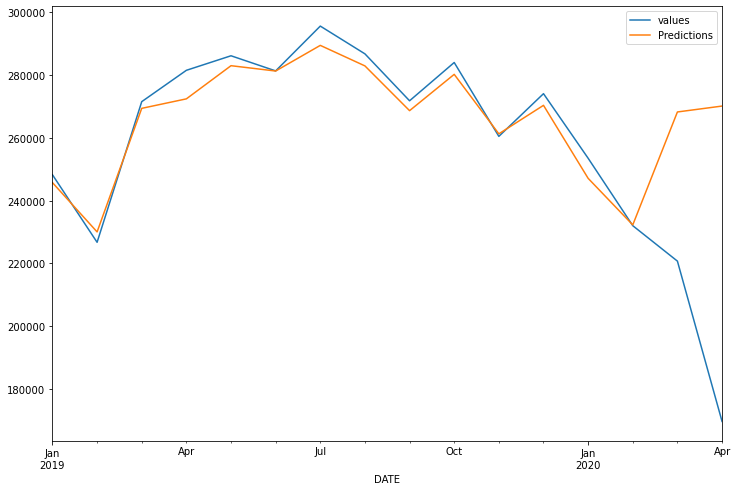

In [55]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [55]:
model.save('my_rnn_model.h5')

## load a model

In [56]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [57]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
